In [6]:
# Importing necessary libraries

import pandas as pd   # for data manipulation and analysis (DataFrames, CSV/Excel reading/writing)
import numpy as np    # for numerical operations (arrays, mathematical functions, linear algebra)


In [7]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes2.csv')


In [8]:
# Display the first 5 rows of the dataset to get a quick look at the data
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Check the dimensions of the dataset: (number of rows, number of columns)
diabetes_data.shape


(768, 9)

In [10]:
# Get a concise summary of the dataset, including:
# - Number of entries (rows)
# - Column names and data types
# - Non-null counts for each column
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Display all column names in the dataset
# Useful to quickly see the features available for analysis or modeling
diabetes_data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Check for missing values in each column
# Returns the total number of null (NaN) values per column
diabetes_data.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Check for duplicate rows in the dataset
# Returns the total number of duplicated rows
diabetes_data.duplicated().sum()


np.int64(0)

In [14]:
# Import libraries for data visualization
import matplotlib.pyplot as plt  # for creating static, interactive, and animated plots
import seaborn as sns            # for statistical data visualization with easier syntax and better aesthetics


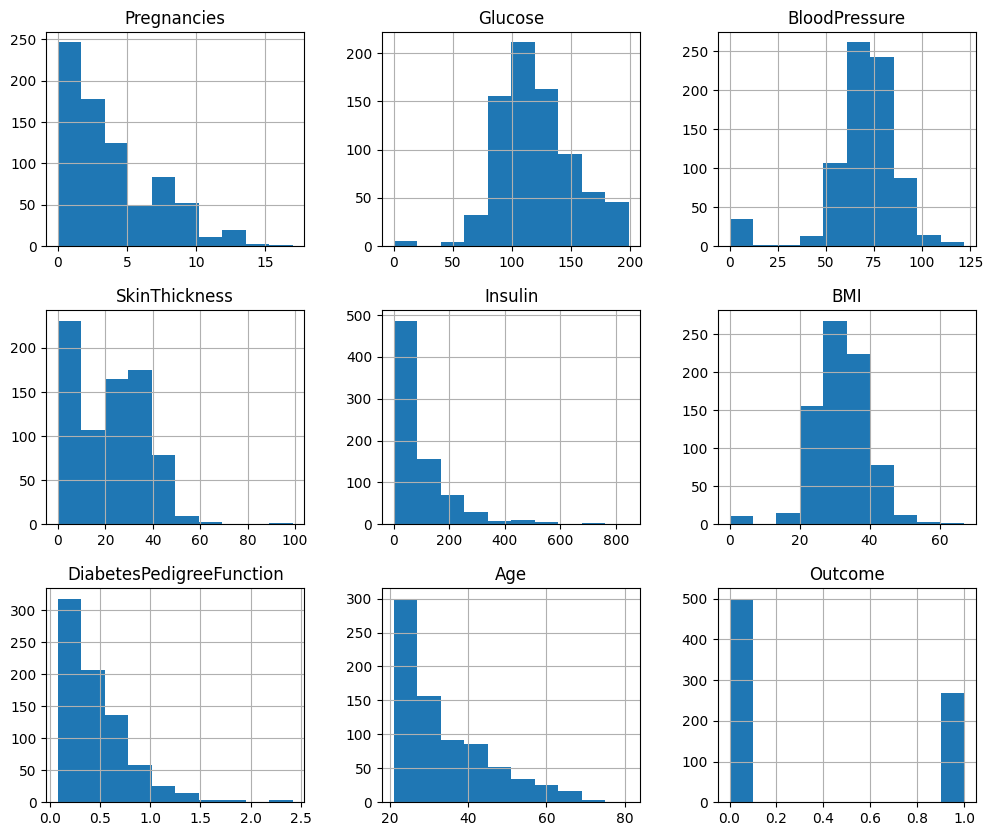

In [15]:
# Import matplotlib's pyplot module for plotting
import matplotlib.pyplot as plt

# Create histograms for all numerical columns in the dataset
# figsize sets the size of the overall figure (width=12, height=10)
diabetes_data.hist(figsize=(12, 10))

# Display all the plots
plt.show()


Histograms of All Numeric Features

Observation:

Features like Glucose, Insulin, and BMI are right-skewed, meaning many patients have low or moderate values, but a few have very high values.

Other features, like BloodPressure and Age, appear more symmetric.

Some features have outliers that may influence model predictions.

Interpretation:

Skewed distributions indicate that scaling or transformation might improve model performance.

Outliers may need consideration, especially for algorithms sensitive to extreme values (e.g., Logistic Regression).

Text(0.5, 1.0, 'Glucose level by Diabetes Outcome')

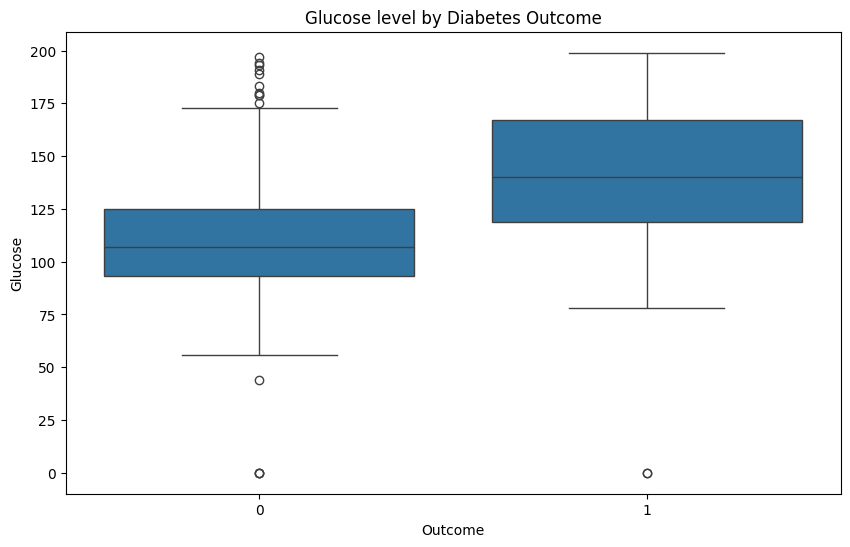

In [16]:
# Create a boxplot to visualize the distribution of Glucose levels for each Diabetes Outcome
plt.figure(figsize=(10, 6))  # Set the figure size

sns.boxplot(x='Outcome', y='Glucose', data=diabetes_data)  # Boxplot using Seaborn

plt.title('Glucose level by Diabetes Outcome')             # Set plot title



Boxplot: Glucose vs Outcome

Observation:

Median Glucose is higher in diabetics.

Diabetic group shows wider spread and some extreme high values.

Insight:

Glucose is a strong predictor of diabetes.

Outliers indicate some patients are at very high risk, and models should account for these extreme values.

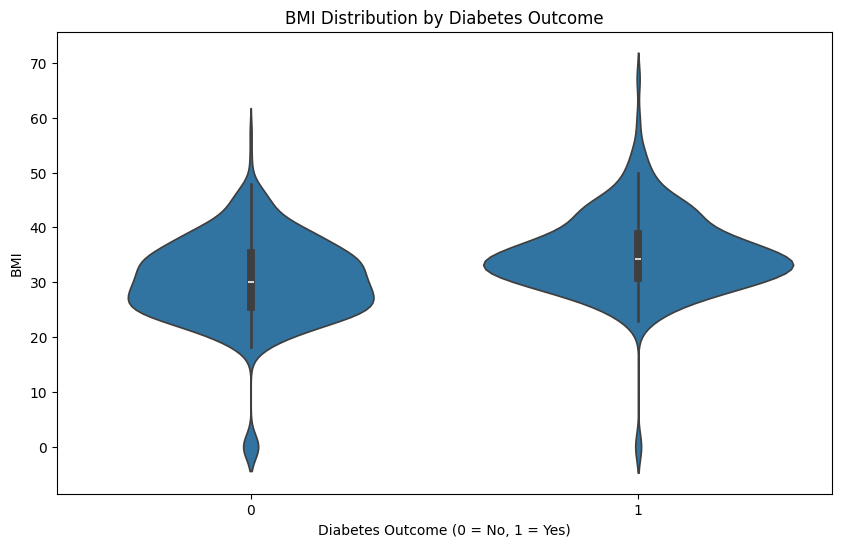

In [17]:

# Create a violin plot to visualize the distribution and density of BMI for each Diabetes Outcome
plt.figure(figsize=(10, 6))  # Set the figure size

sns.violinplot(x='Outcome', y='BMI', data=diabetes_data)  # Violin plot using Seaborn

plt.title('BMI Distribution by Diabetes Outcome')          # Set plot title
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')          # Label for x-axis
plt.ylabel('BMI')                                         # Label for y-axis

plt.show()  # Display the plot



Violin Plot: BMI vs Outcome

Observation:

Median BMI is slightly higher in diabetics.

Non-diabetics cluster at lower BMI; diabetics are more spread out.

Insight:

BMI contributes to diabetes risk but cannot solely separate the two groups.

Useful as a supporting feature when combined with Glucose and other variables.

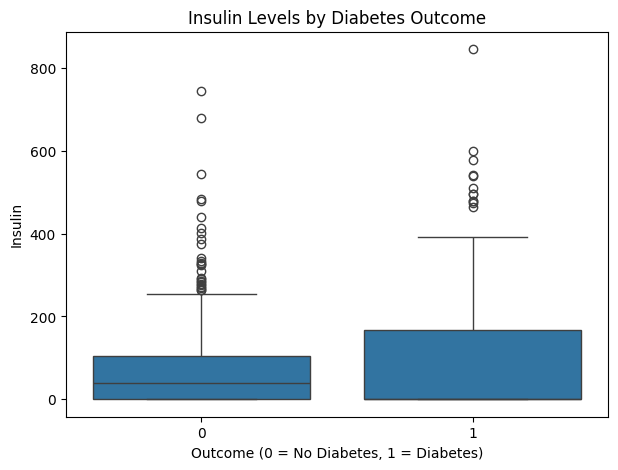

In [18]:
# Create a boxplot to visualize the distribution of Insulin levels for each Diabetes Outcome
plt.figure(figsize=(7, 5))  # Set the figure size

sns.boxplot(x='Outcome', y='Insulin', data=diabetes_data)  # Boxplot using Seaborn

plt.title("Insulin Levels by Diabetes Outcome")            # Set plot title
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")      # Label for x-axis
plt.ylabel("Insulin")                                      # Label for y-axis

plt.show()  # Display the plot


Boxplot: Insulin vs Outcome

Observation:

Median insulin levels slightly higher in diabetics.

Many outliers in both groups; distribution is highly variable.

Insight:

Insulin provides some predictive information, but high variability reduces its individual predictive power.

Scaling or robust methods might improve its usefulness in models.

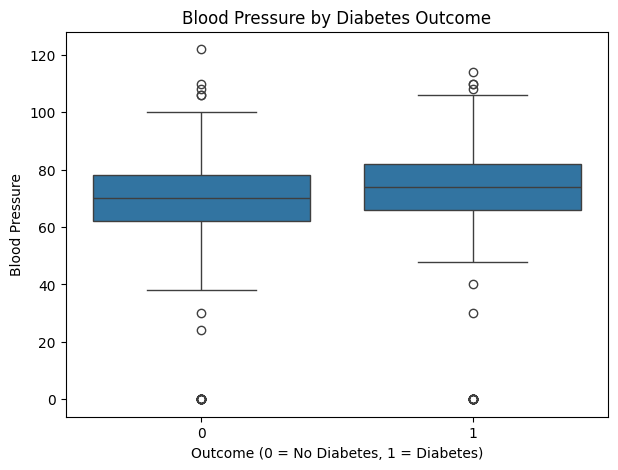

In [19]:
# Create a boxplot to visualize the distribution of Blood Pressure for each Diabetes Outcome
plt.figure(figsize=(7, 5))  # Set the figure size

sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_data)  # Boxplot using Seaborn

plt.title("Blood Pressure by Diabetes Outcome")                  # Set plot title
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")            # Label for x-axis
plt.ylabel("Blood Pressure")                                      # Label for y-axis

plt.show()  # Display the plot


Boxplot: BloodPressure vs Outcome

Observation:

Distributions of Blood Pressure are very similar for diabetics and non-diabetics.

Insight:

Blood Pressure alone is not predictive for diabetes.

Might still be useful in combination with other features in tree-based models.

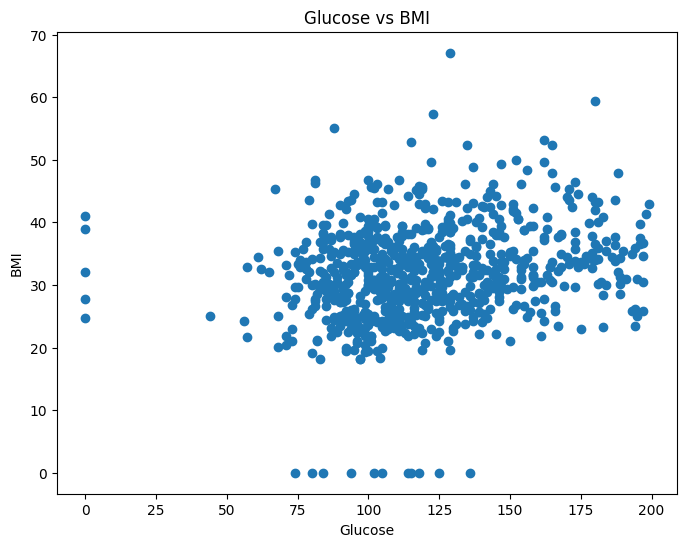

In [20]:
# Create a scatter plot to visualize the relationship between Glucose and BMI
plt.figure(figsize=(8, 6))  # Set the figure size

plt.scatter(diabetes_data['Glucose'], diabetes_data['BMI'])  # Scatter plot
plt.xlabel('Glucose')                                        # Label for x-axis
plt.ylabel('BMI')                                            # Label for y-axis
plt.title('Glucose vs BMI')                                  # Set plot title

plt.show()  # Display the plot


Scatter Plot: Glucose vs BMI

Observation:

Diabetics generally have higher Glucose and BMI.

Some high Glucose patients have low BMI, showing exceptions.

Non-diabetics cluster at lower Glucose and BMI.

Insight:

Shows a positive relationship between Glucose and BMI.

Diabetes is influenced by multiple factors; no single feature perfectly separates classes.

Useful to detect clusters or unusual patterns in the data.

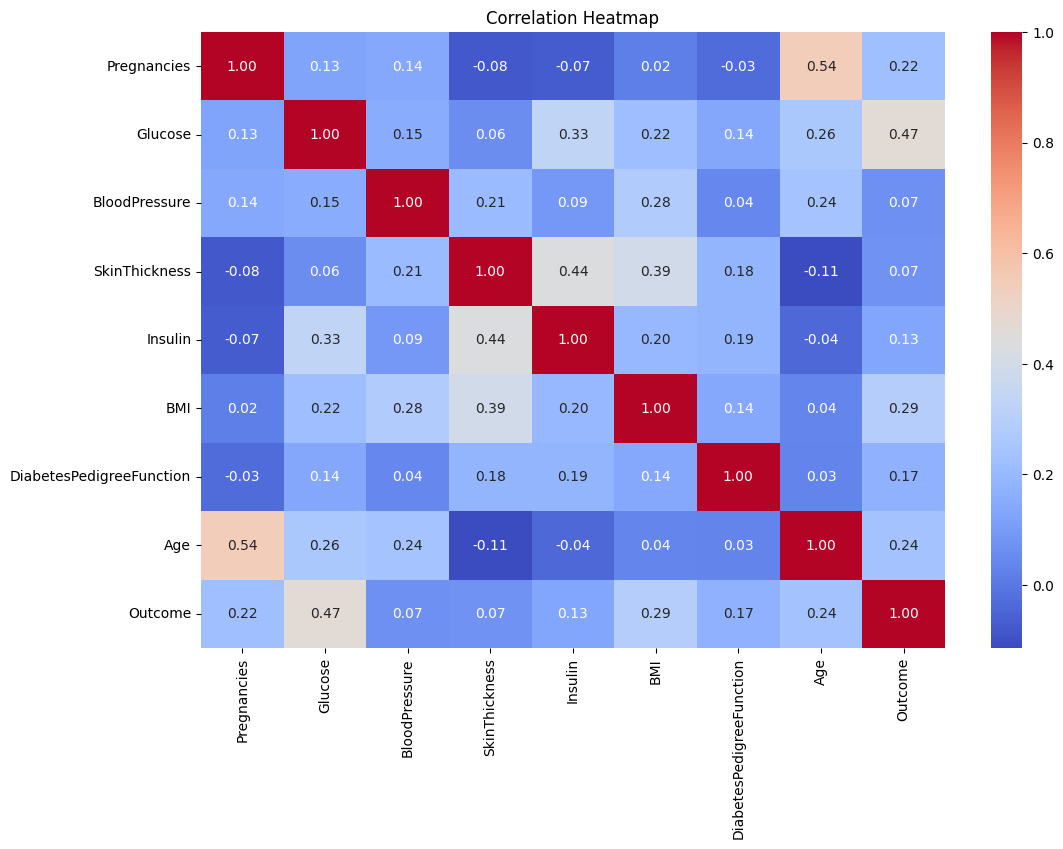

In [21]:
# Create a correlation heatmap to visualize relationships between all numerical features
plt.figure(figsize=(12, 8))             # Set the figure size

corr = diabetes_data.corr()             # Compute the correlation matrix for numerical columns

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')  # Plot heatmap with annotations
plt.title('Correlation Heatmap')        # Set plot title

plt.show()  # Display the heatmap


Correlation Heatmap

Observation:

Glucose has the strongest positive correlation with Outcome.

BMI and Insulin have moderate positive correlations.

BloodPressure, Age, and DiabetesPedigreeFunction have weak correlations.

Insight:

Glucose, BMI, and Insulin are key predictive features.

Weakly correlated features may still help in tree-based models but are less influential for linear models.

Helps guide feature selection and model prioritization.

In [22]:
# Assign features (X) and target (y) for modeling

# Features: all columns except the target 'Outcome'
X = diabetes_data.drop('Outcome', axis=1)

# Target: the column we want to predict
y = diabetes_data['Outcome']


In [23]:
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split features (X) and target (y) into training and testing sets
# test_size=0.25 -> 25% of data will be used for testing, 75% for training
# random_state=42 -> ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
)


In [24]:

# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This standardizes features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do NOT fit again)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
# max_iter=1000 ensures enough iterations for convergence
log_model = LogisticRegression(max_iter=1000)

# Train (fit) the model on the training data
log_model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:

# Use the trained Logistic Regression model to make predictions on the test data
y_pred = log_model.predict(X_test)


In [27]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print the accuracy of the model on test data
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix to see True Positives, True Negatives, 
# False Positives, and False Negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print a detailed classification report including precision, recall, f1-score, and support
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7239583333333334
Confusion Matrix:
 [[95 28]
 [25 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



In [28]:
# Import DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
# random_state=42 ensures reproducibility of results
dt_model = DecisionTreeClassifier(random_state=42)

# Train (fit) the Decision Tree model on the training data
dt_model.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
# Use the trained Decision Tree model to make predictions on the test data
y_pred = dt_model.predict(X_test)



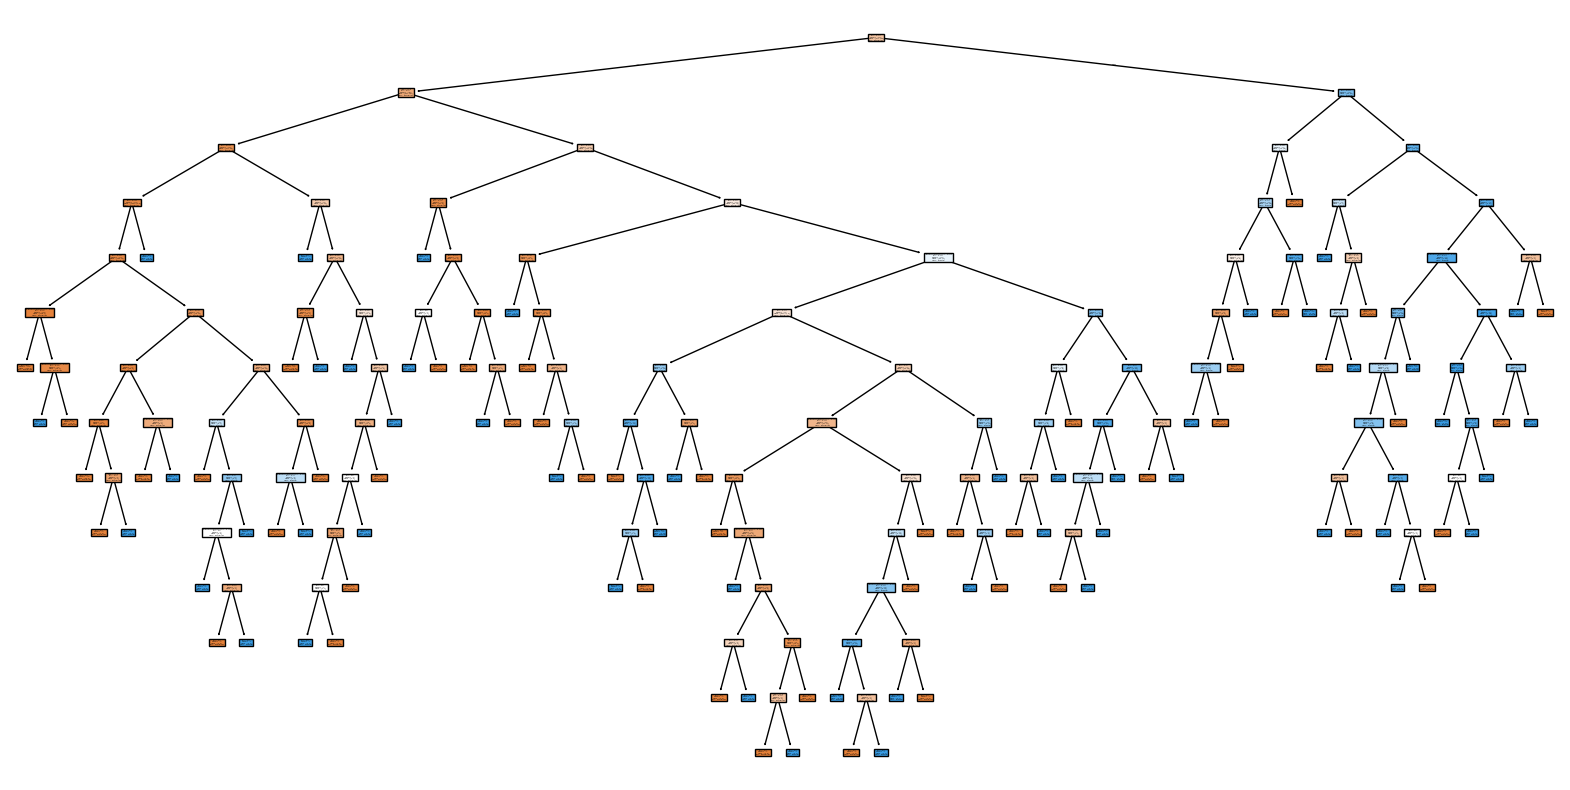

In [30]:
# Import function to visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(20, 10))

# Plot the trained Decision Tree
# feature_names: names of input features for labeling the nodes
# class_names: names of target classes for labeling leaves
# filled=True: colors nodes by class to make visualization easier to interpret
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True
)
plt.show()



In [31]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print the accuracy of the model on test data
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix to show:
# True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print a detailed classification report including:
# precision, recall, f1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7083333333333334
Confusion Matrix:
 [[87 36]
 [20 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       123
           1       0.58      0.71      0.64        69

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



In [32]:
# Import RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
# n_estimators=100 -> number of decision trees in the forest
# max_depth=None -> trees can grow until all leaves are pure or contain min_samples_split samples
# random_state=42 -> ensures reproducibility of results
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Train (fit) the Random Forest model on the training data
rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = rf_model.predict(X_test)


In [34]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print the model's accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix to see:
# True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print a detailed classification report including:
# precision, recall, f1-score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.734375
Confusion Matrix:
 [[96 27]
 [24 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       123
           1       0.62      0.65      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.74       192

